In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from ydata_profiling import ProfileReport
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pickle

In [3]:
df=pd.read_csv('online_shoppers_intention.csv')

In [4]:
#rapport = ProfileReport(df, title="Profiling Report", explorative=True)
#rapport.to_file("rapport_IntentionAchat.html")

In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int8   
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

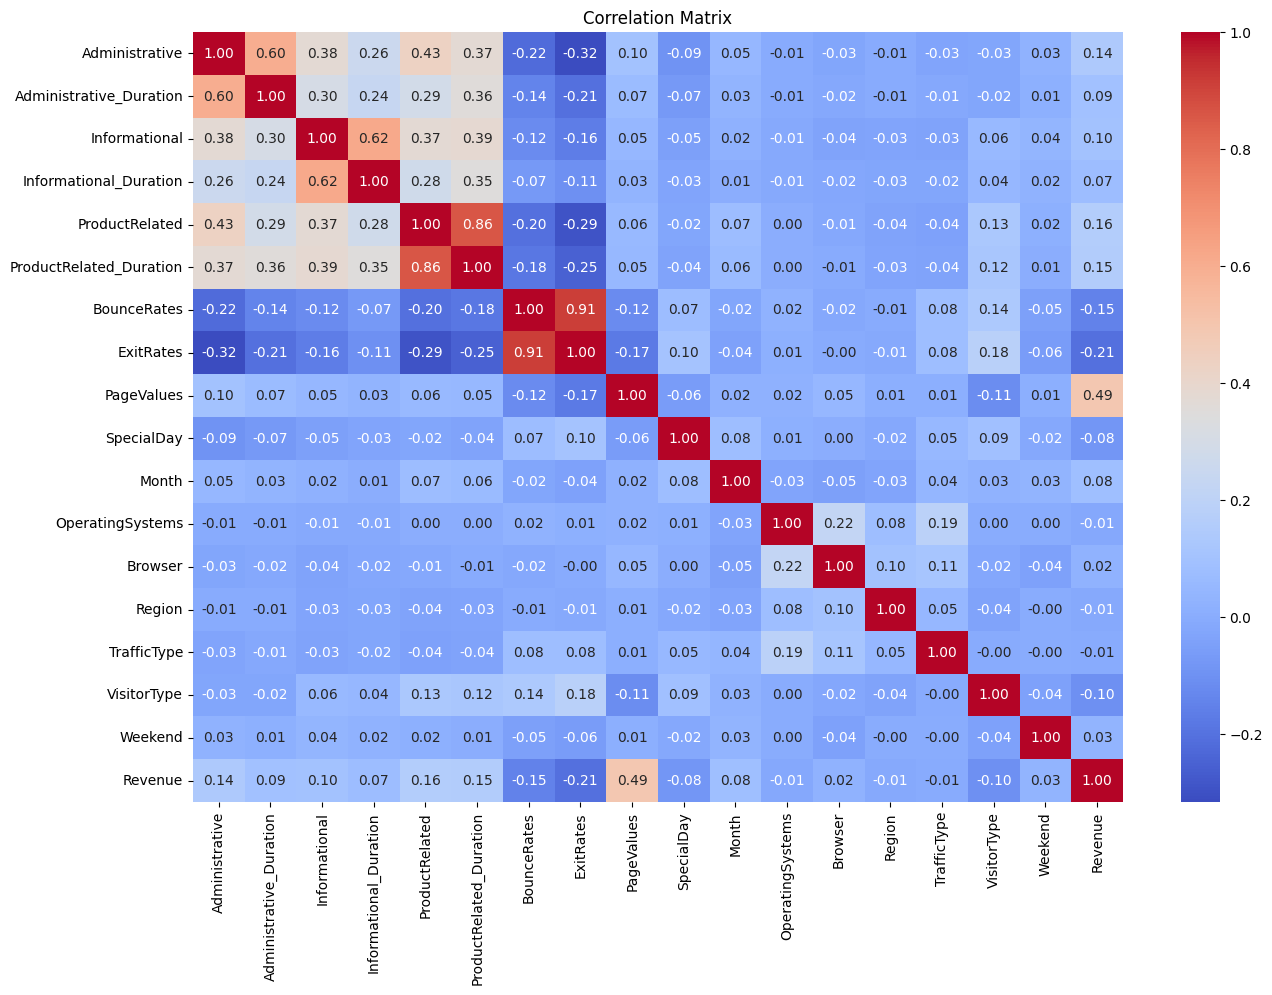

In [11]:
# Martix de correlation
cm=df.corr()
plt.figure(figsize=(15,10))  
sns.heatmap(cm,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df=df.drop_duplicates()

In [13]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
df.shape

(12205, 18)

In [15]:
def detect_outliers(df):
    df_num = df.select_dtypes(include=['number'])  #Garder uniquement les colonnes numériques
    
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_num < lower_bound) | (df_num > upper_bound)
    return outliers

In [16]:
outliers = detect_outliers(df)
df_cleaned = df[~outliers.any(axis=1)]  # Supprime les lignes contenant des valeurs aberrantes

# 🔍 Vérification
print(f"Dataset initial : {df.shape}, Dataset nettoyé : {df_cleaned.shape}")

Dataset initial : (12205, 18), Dataset nettoyé : (1640, 18)


In [17]:
df['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

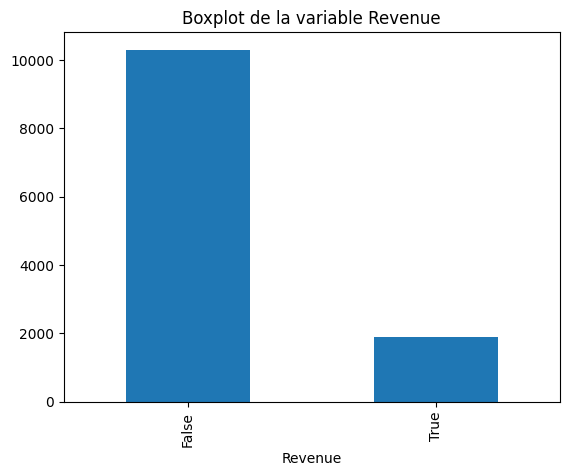

In [18]:
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Boxplot de la variable Revenue')
plt.show()

Text(0, 0.5, 'Informational_Duration')

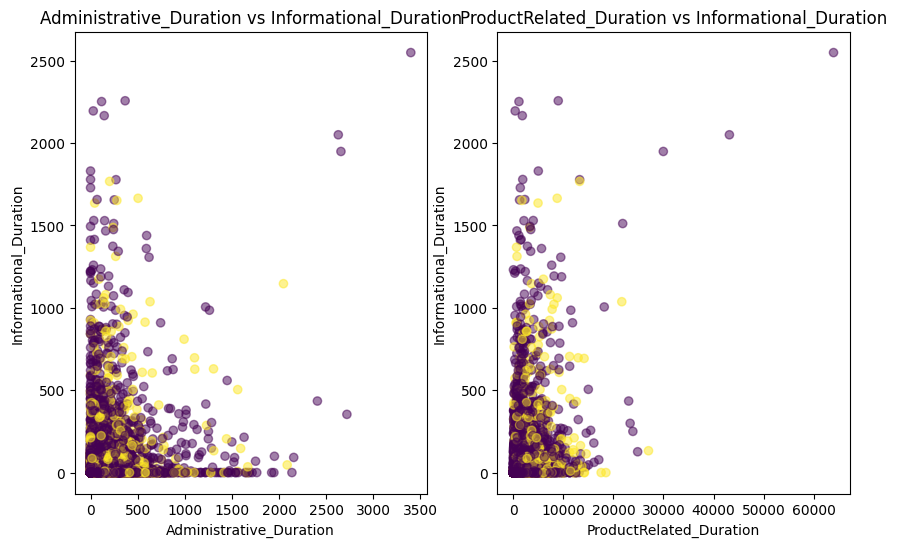

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(df['Administrative_Duration'], df['Informational_Duration'], c=df['Revenue'], cmap='viridis', alpha=0.5)
plt.title('Administrative_Duration vs Informational_Duration')
plt.xlabel('Administrative_Duration')
plt.ylabel('Informational_Duration')
plt.subplot(1,2,2)
plt.scatter(df['ProductRelated_Duration'], df['Informational_Duration'], c=df['Revenue'], cmap='viridis', alpha=0.5)
plt.title('ProductRelated_Duration vs Informational_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Informational_Duration')



Text(0.5, 0, 'ExitRates')

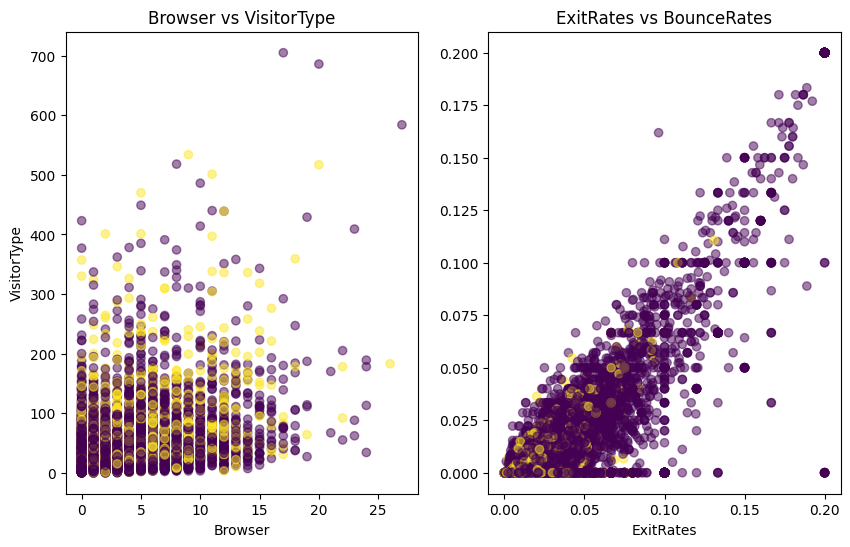

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(df['Administrative'], df['ProductRelated'], c=df['Revenue'], cmap='viridis', alpha=0.5)
plt.title('Browser vs VisitorType')
plt.xlabel('Browser')
plt.ylabel('VisitorType')
plt.subplot(1,2,2)
plt.scatter(df['ExitRates'], df['BounceRates'], c=df['Revenue'], cmap='viridis', alpha=0.5)
plt.title('ExitRates vs BounceRates')
plt.xlabel('ExitRates')

In [21]:
# Séparation des classes majoritaire et minoritaire
classe_majoritaire = df[df['Revenue'] == 0]
classe_minoritaire = df[df['Revenue'] == 1]

In [22]:
#Sous-échantillonnage de la classe majoritaire
classe_majoritaire_downsampled = resample(classe_majoritaire,replace=False,n_samples=len(classe_minoritaire),random_state=42)
df = pd.concat([classe_majoritaire_downsampled, classe_minoritaire])

In [23]:
X=df.drop('Revenue', axis=1)
y=df['Revenue']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Appliquer SMOTE sur les données d'entraînement over-sampling pour équilibrer les classes
#smote =SMOTE(random_state=42)
#X_train_smote,y_train_smote = smote.fit_resample(X_train, y_train)


In [26]:
y_train.value_counts()

Revenue
True     1535
False    1517
Name: count, dtype: int64

In [27]:
#Random Forest Classifier
rf_model= RandomForestClassifier(n_estimators=100,min_samples_split=5,max_depth=20,random_state=42)

In [28]:
#Entraînement du modèle
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [29]:
#Prédiction sur les données de test
y_pred =rf_model.predict(X_test)

In [30]:
#Evaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8573298429319371
Precision: 0.8548387096774194
Recall: 0.8525469168900804
F1 Score: 0.8536912751677852


In [31]:
#Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86       391
        True       0.85      0.85      0.85       373

    accuracy                           0.86       764
   macro avg       0.86      0.86      0.86       764
weighted avg       0.86      0.86      0.86       764



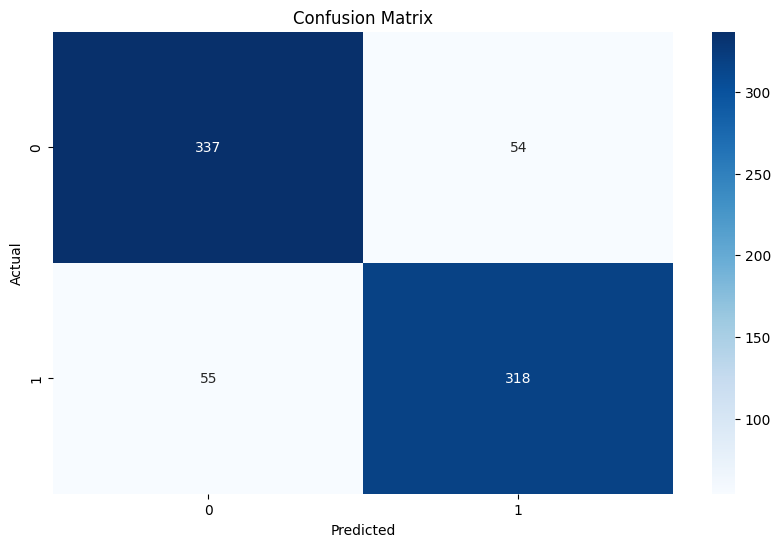

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

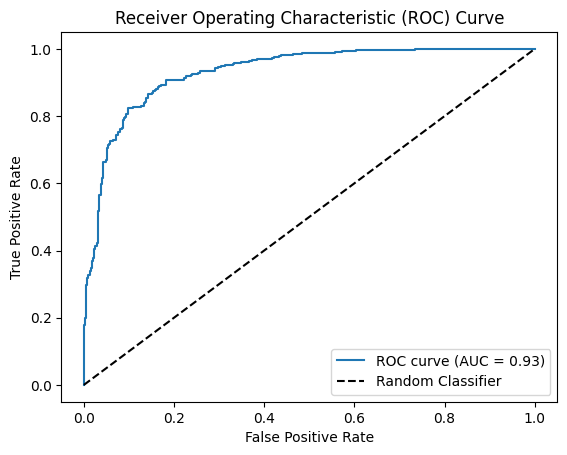

In [33]:
#curve ROC
Y_pred_proba = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
random_search = RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid,n_iter=10,scoring='f1',cv=5,random_state=42)                                                
random_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres :", random_search.best_params_)
print("Meilleur score F1 :", random_search.best_score_)


In [36]:
with open("modele_conversion.pkl", "wb") as f:
    pickle.dump(rf_model, f)